In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
path=r"C:\Users\ASHISH KUMAR\Data Science Class\Class notes\EDA\Data File\Visadataset.csv"

In [82]:
visa_df=pd.read_csv(path)

In [83]:
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [84]:
cat_columns=visa_df.select_dtypes(include="object").columns
num_columns=visa_df.select_dtypes(exclude="object").columns
num_columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**Box Plot**

- Box plot is used to identify the outliers

- Outlier is an observation having huge postive value or huge negative value

- Q1 = 25p  , Q2=50p and Q3=75p

- IQR = Inter quartile range= Q3-Q1

- Q3+ 1.5* IQR  and  Q1-1.5*IQR


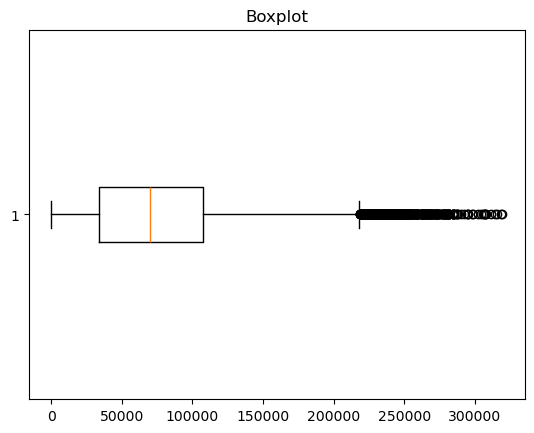

In [85]:
#Read the preavailing wage data and plot box plot
wage_data=visa_df["prevailing_wage"]
plt.boxplot(wage_data,vert=False)
plt.title("Boxplot")
plt.show("wages")
plt.show()

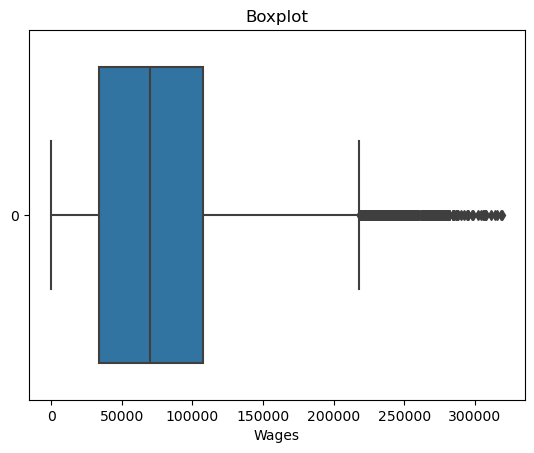

In [86]:
wage_data=visa_df['prevailing_wage']
sns.boxplot(wage_data,orient='h')
plt.title('Boxplot')
plt.xlabel('Wages')
plt.show()

**plot the histogram and box plot side by side**

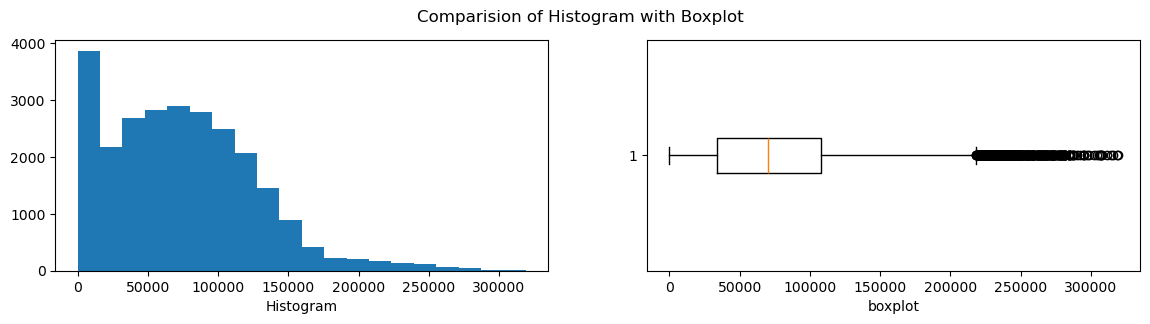

In [87]:
wage_data=visa_df["prevailing_wage"]
plt.figure(figsize=(14,3))
plt.suptitle('Comparision of Histogram with Boxplot')
plt.subplot(1,2,1)
plt.hist(wage_data,bins=20)
plt.xlabel("Histogram")
plt.subplot(1,2,2)
plt.boxplot(wage_data,vert=False)
plt.xlabel("boxplot")
plt.show()

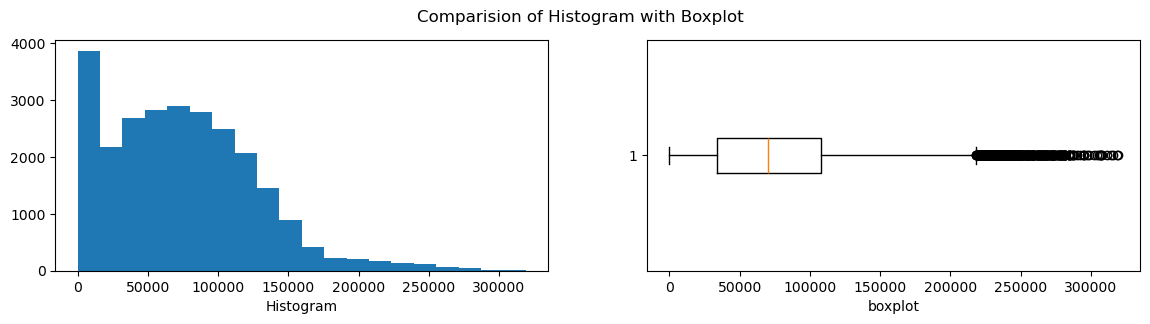

In [88]:
wage_data=visa_df["prevailing_wage"]
plt.figure(figsize=(14,3))
plt.suptitle('Comparision of Histogram with Boxplot')
plt.subplot(1,2,1).hist(wage_data,bins=20)
plt.xlabel("Histogram")
plt.subplot(1,2,2).boxplot(wage_data,vert=False)
plt.xlabel("boxplot")
plt.show()

**Finding the outliers**

**Finding the outliers**

- We already know that outliers avialble less than Q1-1.5*IQR and Q3+1.5*IQR

- Step-1:

    - Calculate Q1 = 25p

    - Calculate Q2= 50p

    - Calculate Q3= 75p

- Step-2:

     - Calculate IQR= Q3-Q1

- Step-3:

    - Calculate LB= Q1-1.5*IQR

    - Calculate UB=Q3+1.5*IQR

- Step-4:

    - Con1= wage data <LB

    - Con2= wage data >UB

    - Con3= con1 or-and con2 (use bitwise operator)

- Step-5:  Data [con3]

In [89]:
wage_data=visa_df['prevailing_wage']
# step-1
q1=np.percentile(wage_data,25)
q2=np.percentile(wage_data,50)
q3=np.percentile(wage_data,75)
# Step-2:
IQR= q3-q1
# Step-3:
lb= q1-1.5*IQR
ub=q3+1.5*IQR
#Step-4:
con1=wage_data<lb # T F
con2=wage_data>ub # T F
con3=con1|con2 
# Bitwise operators used to compare
# Bits data === 0 and 1 == True false
#Step-3:
outliers_data=wage_data[con3]
outliers_data

14       220081.73
34       225569.73
130      247393.01
216      269321.68
221      219529.62
           ...    
25191    280482.51
25195    234308.77
25468    272715.74
25469    273772.47
25476    279174.79
Name: prevailing_wage, Length: 427, dtype: float64

In [90]:
outliers_df=visa_df[con3]
outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [91]:
wage_data=visa_df['prevailing_wage']
# step-1
q1=np.percentile(wage_data,25)
q2=np.percentile(wage_data,50)
q3=np.percentile(wage_data,75)
# Step-2:
IQR= q3-q1
# Step-3:
lb= q1-1.5*IQR
ub=q3+1.5*IQR
#Step-4:
con1=wage_data>lb # T F
con2=wage_data<ub # T F
con3=con1&con2 
# Bitwise operators used to compare
# Bits data === 0 and 1 == True false
#Step-3:
#np.logical_and(Con1, Con2) 
non_outliers_df=visa_df[con3]
non_outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


- we have two dataframe

- Visa_df: Total data 25480

- non_outliers_df= After removing outliers 25053

- first plot nonoutliers data prewaling wage hsitogram and boxplot

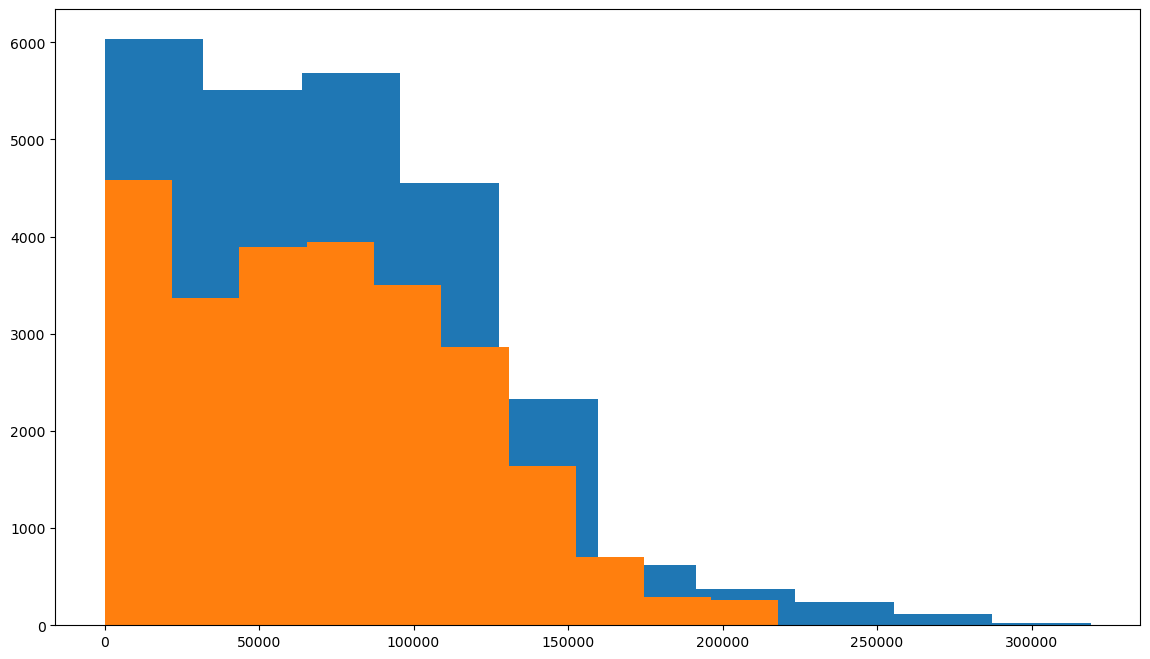

In [92]:
wage_data_non_outliers=non_outliers_df["prevailing_wage"]
wage_data=visa_df["prevailing_wage"]
plt.figure(figsize=(14,8))
plt.hist(wage_data)
plt.hist(wage_data_non_outliers)
plt.show()

**How to deal outliers**

- 1. We can drop the outliers

     - Dropping outliers is an easy task,but not recommended
     - if you drop the outlier we are dropping the rows
     - which means we are dropping the other column values
     - but in industry if outlier percentage less then 2% of the total data,we can drop
     - the number of outliers in pwage is 427
     - the number of total observations ara 25480
     - the percentage is 1.67 which is less then 2%

- 2.  Fill with Median value

     - we already know that outliers does not affect by median
     - so it is the best practice to fill the outliers with median
 
- 3. Capping or Florring

     - Instead of fill with median

     - we can fill with certain values

     - the outliers which are less then LB fill with LB value
     - the outliers which are greater then LB fill with LB value

**Fill with Median Value**

**np.where**

- in numpy we have a method called where
- it takes three arguments

  - 1. Condition
  - 2. value if condition is True
  - 3. value if condition is False
- 

In [93]:
list1=[]
for value in wage_data:
    if value<lb or value>ub:
        median=wage_data.median()
        list1.append(median)
    else:
        list1.append(value)
list1

[592.2029,
 83425.65,
 122996.86,
 83434.03,
 149907.39,
 78252.14,
 53635.39,
 418.2298,
 74362.19,
 67514.76,
 83588.56,
 70813.09,
 28663.05,
 107196.03,
 70308.20999999999,
 74108.02,
 3706.79,
 16132.61,
 150441.13,
 79948.12,
 71128.98,
 137694.98,
 45642.39,
 90108.38,
 71286.04,
 99489.65,
 86332.95,
 103029.33,
 40925.86,
 189190.48,
 79594.12,
 135866.13,
 72077.57,
 81921.18,
 70308.20999999999,
 92421.92,
 2490.12,
 110817.26,
 50960.01,
 125336.9,
 39633.32,
 156326.33,
 43630.58,
 54614.42,
 28989.87,
 22924.91,
 61567.75,
 156251.17,
 86022.02,
 49565.37,
 66191.41,
 95623.2,
 115014.05,
 35018.04,
 230.8072,
 113799.64,
 85854.09,
 14174.04,
 47176.84,
 4949.28,
 67410.59,
 58791.58,
 103.2216,
 62591.57,
 102919.59,
 123468.56,
 82324.64,
 5319.49,
 153019.94,
 38059.89,
 230.327,
 61521.92,
 121316.5,
 122540.55,
 47170.76,
 330.3743,
 2927.34,
 107781.48,
 590.0203,
 194176.83,
 102073.81,
 113882.38,
 70778.82,
 84125.48,
 174014.59,
 34213.17,
 79813.05,
 113327.34

In [94]:
dict1={"sub":['DS','DE','CS'],'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

,sub,marks
0,DS,100
1,DE,200
2,CS,300


In [95]:
#q : I want to replace marks with 1 ,which are greater the 100


In [96]:
l=[]
for value in df.marks:
    if value<100:
        l.append(1)
    else:
        l.append(value)
df["marks"]=l
df

,sub,marks
0,DS,100
1,DE,200
2,CS,300


**Bi variate analysis**

In [97]:
- 

SyntaxError: invalid syntax (3213666384.py, line 1)

**Categorical-Categorical**

- Lets consider two columns

   - Continent
   - Case status

In [98]:
#continent

visa_df["continent"].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [99]:
visa_df["case_status"].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

**Task**

In [100]:
- Find 

NameError: name 'Find' is not defined

In [101]:
#step-1:make the 1st condition continent=="asia"
#step-2:make the 2nd condition case_status=="certified"
#step-3:make the 3rd condition== con1&con2
#step-4:

In [102]:
con1=visa_df["continent"]=="Asia"
con2=visa_df["case_status"]=="Certified"
con3=con1&con2
len(visa_df[con3])

11012

In [103]:
visa_df["continent"].unique()


array(['Asia', 'Africa', 'North America', 'Europe', 'South America',
       'Oceania'], dtype=object)

In [104]:
visa_df["continent"].value_counts().keys()

Index(['Asia', 'Europe', 'North America', 'South America', 'Africa',
       'Oceania'],
      dtype='object', name='continent')

In [105]:
continents=visa_df["continent"].unique()
continent_denied=[]
for i in continents:
    con1=visa_df["continent"]==i
    con2=visa_df["case_status"]=="Certified"
    con3=con1&con2
    count=len(visa_df[con3])
    print(f"the number of certified visa from {i} is:{count}")
    continent_denied.append(count)

the number of certified visa from Asia is:11012
the number of certified visa from Africa is:397
the number of certified visa from North America is:2037
the number of certified visa from Europe is:2957
the number of certified visa from South America is:493
the number of certified visa from Oceania is:122


In [106]:
continents=visa_df["continent"].unique()
continent_denied,continent_certified=[],[]
for i in continents:
    con1=visa_df["continent"]==i
    con2=visa_df["case_status"]=="Certified"
    con3=visa_df["case_status"]=="Denied"
    con4=con1&con2
    con5=con1&con3
    cert_count=len(visa_df[con4])
    den_count=len(visa_df[con5])
    print(f"the number of certified visa from {i} is:{cert_count}")
    print(f"the number of denied visa from {i} is:{den_count}")
    continent_certified.append(cert_count)
    continent_denied.append(den_count)
df=pd.DataFrame(zip(continent_certified,continent_denied),index=continents,columns=['certified','denied']) 
df

the number of certified visa from Asia is:11012
the number of denied visa from Asia is:5849
the number of certified visa from Africa is:397
the number of denied visa from Africa is:154
the number of certified visa from North America is:2037
the number of denied visa from North America is:1255
the number of certified visa from Europe is:2957
the number of denied visa from Europe is:775
the number of certified visa from South America is:493
the number of denied visa from South America is:359
the number of certified visa from Oceania is:122
the number of denied visa from Oceania is:70


,certified,denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


**Cross tab**

- in above data frame we can make by using a method : **cross tab**
- it is availabe in pandas
- it takes two argument
  - index

  - column

- in above data frame index column is : **continent**
- in above data frame data column is : 

In [108]:
pd.crosstab(visa_df["continent"],visa_df["case_status"])

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


In [109]:
df4.plot(kind="bar")

NameError: name 'df4' is not defined

In [110]:
df3.plot(kind="bar")

NameError: name 'df3' is not defined

**Multivariate analysis**

- Education

- continent

- case status

- we already know from asia there 11k accepted visa

- in that i want 
  

**Numerical vs Numerical**

- To understand Numerical columns relation we need to plot scatter plots

- Scatter plots gives the relation between two numerical columns

- Bar chart-pie chart-histogram-scatter plots

- scatter plot under matplotlib package

- **plt.scatter**

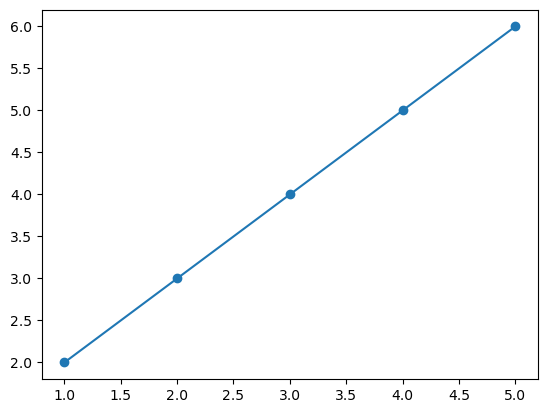

In [113]:
x=[1,2,3,4,5]
y=[2,3,4,5,6]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

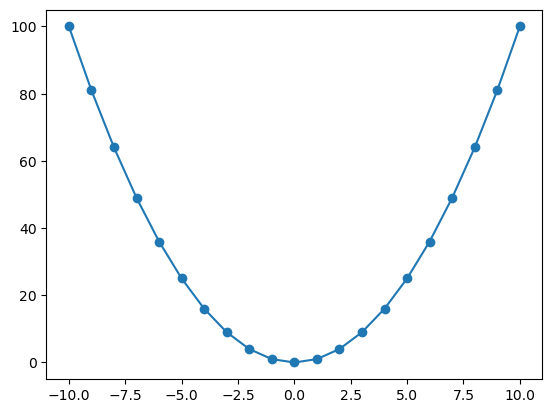

In [114]:
x=[i for i in range(-10,11)]
y=[i*i for i in x]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

In [ ]:
#step-1: read one numerical column
#step-2 : 

In [116]:
visa_df.select_dtypes(exclude="object").columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [117]:
visa_df["no_of_employees"]

0        14513
1         2412
2        44444
3           98
4         1082
         ...  
25475     2601
25476     3274
25477     1121
25478     1918
25479     3195
Name: no_of_employees, Length: 25480, dtype: int64

In [118]:
visa_df['yr_of_estab']

0        2007
1        2002
2        2008
3        1897
4        2005
         ... 
25475    2008
25476    2006
25477    1910
25478    1887
25479    1960
Name: yr_of_estab, Length: 25480, dtype: int64

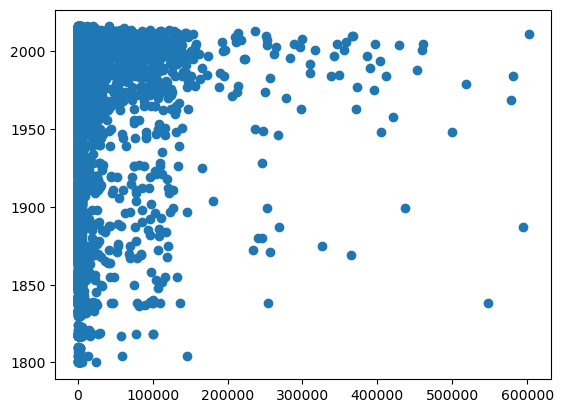

In [120]:
x= visa_df["no_of_employees"]
y=visa_df['yr_of_estab']
plt.scatter(x,y)
plt.show()

In [ ]:
col1=visa_df["no_of_employees"]
col2=visa_df['yr_of_estab']
col3=visa_df["prevailing_wage"]
plt.

In [ ]:
- implement the co variance function

- Covariance vs correlation

  - covariance will tell about the columns have relation or not

  - Covariance will explain about relation 


  - corelation tells about how much relation between two variance

**method name:corr**

In [122]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


**Heat map**

In [ ]:
- it is one of the important visualization method,to show the matrics
- it is under **seaborn** package
- in every matrix we have heighest values and lowest values

<Axes: >

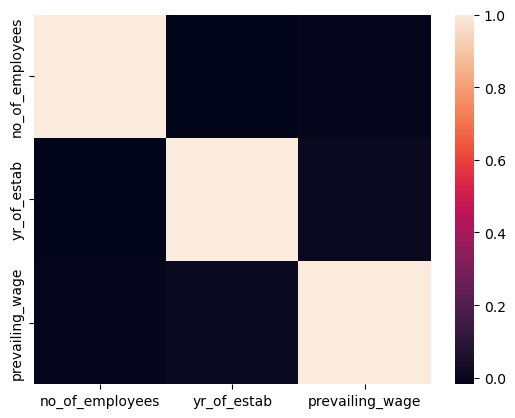

In [124]:
corr_data= visa_df.corr(numeric_only=True)
sns.heatmap(corr_data)

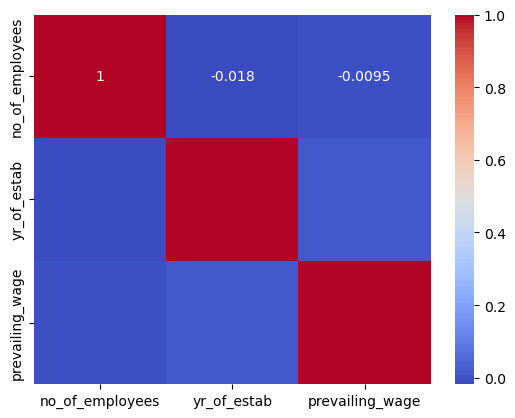

In [127]:
corr_data= visa_df.corr(numeric_only=True)
sns.heatmap(corr_data,annot=True,cmap="coolwarm")
plt.show()

In [ ]:
- By seeing the graphs we might not say the relation status

- it is best practice get the percentage of relaton using correlation

- All 3 columns havingapproximately zero percentage of relation 

- which indicates all 

- no relation means independent each other